In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

# or load through local csv using the line below
#data = pd.read_csv('data.csv')

In [5]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# types for the columns
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [8]:
# numerical summary, only applies to numerical columns
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# number of instances in each class
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [10]:
# Take out a test set
train, test = train_test_split(dataset, test_size = 0.4, stratify = dataset['class'], random_state = 42)
print(len(train), len(test))
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, 4].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify = dataset['class'], random_state = 42)
# print(len(X_train), len(X_test), len(y_train), len(y_test))

90 60


In [11]:
# number of instances in each class in training data
train.groupby('class').size()

class
Iris-setosa        30
Iris-versicolor    30
Iris-virginica     30
dtype: int64

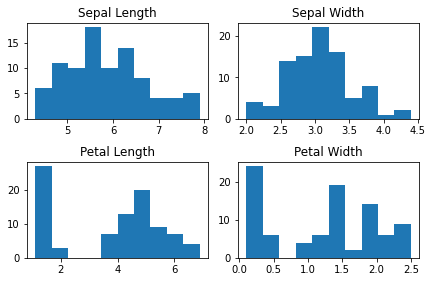

In [12]:
# histograms
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# add some spacing between subplots
fig.tight_layout(pad=1.0);

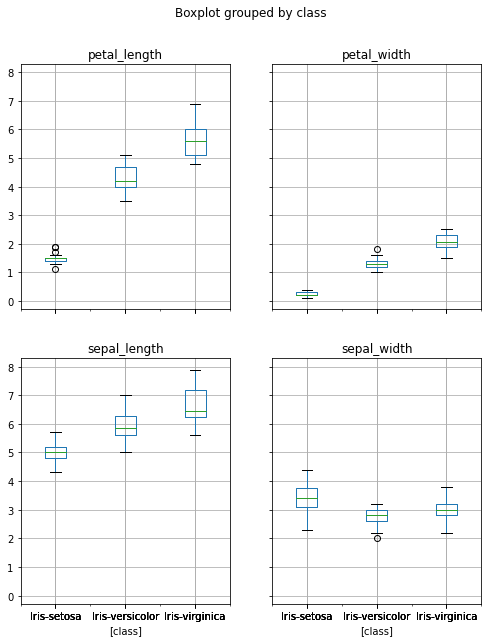

In [13]:
# gb = train.groupby('class')
# #plt.boxplot(gb.get_group('Iris-setosa')['sepal_length']);
# sepal_Length = [gb.get_group('Iris-setosa')['sepal_length'], gb.get_group('Iris-versicolor')['sepal_length'],gb.get_group('Iris-virginica')['sepal_length']]
# sepal_Width = [gb.get_group('Iris-setosa')['sepal_width'], gb.get_group('Iris-versicolor')['sepal_width'],gb.get_group('Iris-virginica')['sepal_width']]
# petal_Length = [gb.get_group('Iris-setosa')['petal_length'], gb.get_group('Iris-versicolor')['petal_length'],gb.get_group('Iris-virginica')['petal_length']]
# petal_Width = [gb.get_group('Iris-setosa')['petal_width'], gb.get_group('Iris-versicolor')['petal_width'],gb.get_group('Iris-virginica')['petal_width']]

# fig, axs = plt.subplots(1, 4)
# axs[0].boxplot(sepal_Length);
# axs[0].set_title("sepal_length");
# axs[1].boxplot(sepal_Width);
# axs[1].set_title('Sepal Width');
# axs[2].boxplot(petal_Length);
# axs[2].set_title('Petal Length');
# axs[3].boxplot(petal_Width);
# axs[3].set_title('Petal Width');

# # add some spacing between subplots
# fig.tight_layout(pad=1.0);

train.boxplot(by = 'class', figsize = (8,10))
plt.show()

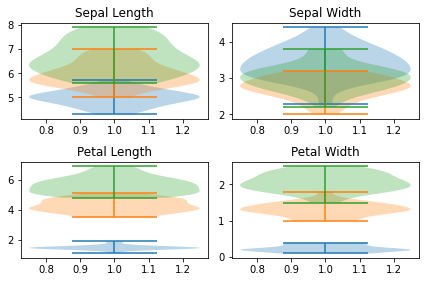

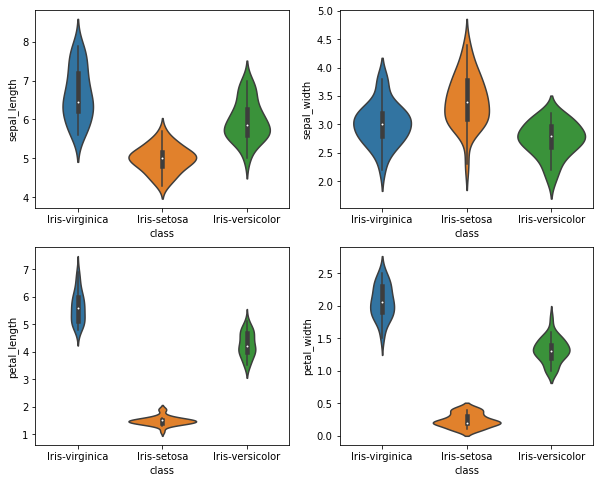

In [14]:
# fig, axs = plt.subplots(2, 2)
# axs[0,0].violinplot(train['sepal_length']);
# axs[0,0].set_title("Sepal Length");
# axs[0,1].violinplot(train['sepal_width']);
# axs[0,1].set_title('Sepal Width');
# axs[1,0].violinplot(train['petal_length']);
# axs[1,0].set_title('Petal Length');
# axs[1,1].violinplot(train['petal_width']);
# axs[1,1].set_title('Petal Width');

# # add some spacing between subplots
# fig.tight_layout(pad=1.0);

# # train.violinplot(by = 'class', figsize = (8,10))
# # plt.show()

# gb = train.groupby('class')
# sepal_Length = [gb.get_group('Iris-setosa')['sepal_length'], gb.get_group('Iris-versicolor')['sepal_length'],gb.get_group('Iris-virginica')['sepal_length']]

# fig, axs = plt.subplots(2, 2)

# axs[0,0].violinplot(sepal_Length)
# classes = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
# #axs[0,0].violinplot(train[train['class'] == classes[1]]['sepal_length'])
# #axs[0,0].violinplot(train[train['class'] == classes[2]]['sepal_length'])
# axs[0,0].set_title('Sepal Length')
fig, axs = plt.subplots(2, 2)
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
axs[0,0].violinplot(train[train['class'] == classes[0]]['sepal_length']);
axs[0,0].violinplot(train[train['class'] == classes[1]]['sepal_length']);
axs[0,0].violinplot(train[train['class'] == classes[2]]['sepal_length']);
axs[0,0].set_title('Sepal Length');
axs[0,1].violinplot(train[train['class'] == classes[0]]['sepal_width']);
axs[0,1].violinplot(train[train['class'] == classes[1]]['sepal_width']);
axs[0,1].violinplot(train[train['class'] == classes[2]]['sepal_width']);
axs[0,1].set_title('Sepal Width');
axs[1,0].violinplot(train[train['class'] == classes[0]]['petal_length']);
axs[1,0].violinplot(train[train['class'] == classes[1]]['petal_length']);
axs[1,0].violinplot(train[train['class'] == classes[2]]['petal_length']);
axs[1,0].set_title('Petal Length');
axs[1,1].violinplot(train[train['class'] == classes[0]]['petal_width']);
axs[1,1].violinplot(train[train['class'] == classes[1]]['petal_width']);
axs[1,1].violinplot(train[train['class'] == classes[2]]['petal_width']);
axs[1,1].set_title('Petal Width');

fig.tight_layout(pad=1.0);

fig = plt.figure(figsize=(10,8))

for i in range(4):
    ax = fig.add_subplot(221+i)
    sns.violinplot(x='class', y=attributes[i],
                  data=train, split=True, ax=ax)

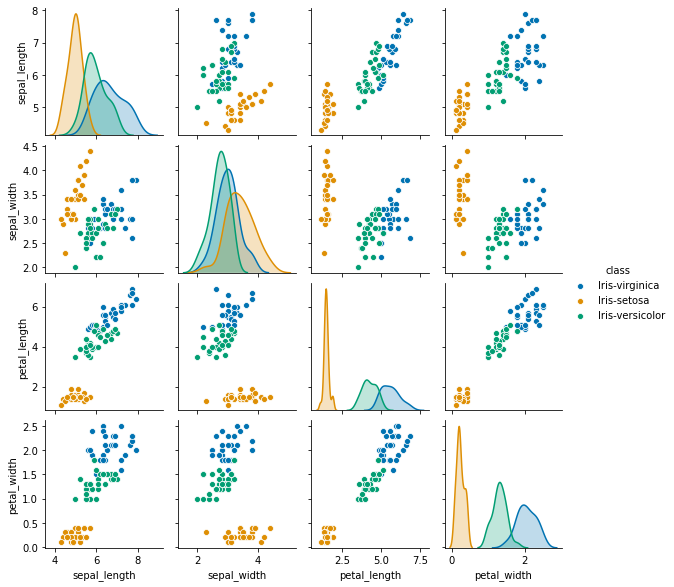

In [15]:
sns.pairplot(train, hue="class", height = 2, palette = 'colorblind');

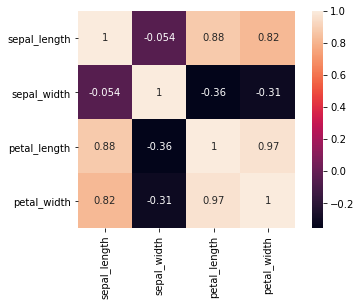

In [16]:
# correlation matrix
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

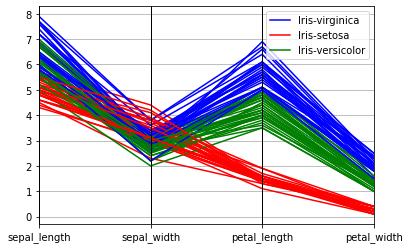

In [17]:
# parallel coordinates
parallel_coordinates(train, "class", color = ['blue', 'red', 'green']);

In [19]:
# Model development

X_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train['class']
X_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test['class']

In [20]:
#decision tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1) #creating the model variable
mod_dt.fit(X_train,y_train) #fitting the model to x values which generate y results 
prediction=mod_dt.predict(X_test) #predicting on X_text
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test))) #measuring prediction versus actual data

The accuracy of the Decision Tree is 0.983


In [21]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

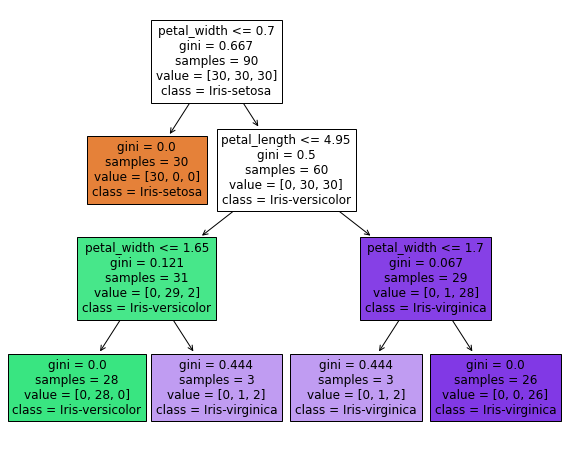

In [22]:
#Example code to build plot tree
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], class_names = classes, filled = True);

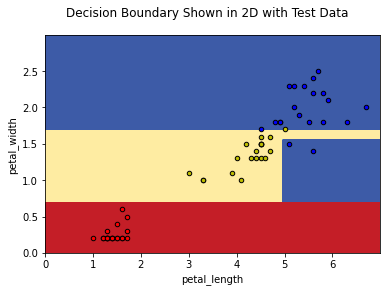

In [23]:
# Example code: will need some tweaking
# plot decision boundary for pedal width vs pedal length
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = DecisionTreeClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en) #running a model specifically based on petal measurements

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

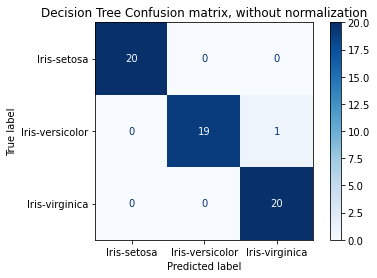

In [24]:
# confusion matrix
# one versicolor misclassified
classes = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

In [25]:
# Example code for Guassian Naive Bayes Classifier to help you make your own
mod_gnb_all = GaussianNB()
y_pred = mod_gnb_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the Guassian Naive Bayes Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier on test data is 0.933


In [26]:
# Guassian Naive Bayes Classifier with two predictors
mod_gnb = GaussianNB()
y_pred = mod_gnb.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Guassian Naive Bayes Classifier with 2 predictors on test data is 0.950


In [27]:
# Example LDA Classifier
mod_lda_all = LinearDiscriminantAnalysis()
y_pred = mod_lda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the LDA Classifier on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))


The accuracy of the LDA Classifier on test data is 0.983


In [28]:
# LDA Classifier with two predictors
mod_lda = LinearDiscriminantAnalysis()
y_pred = mod_lda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the LDA Classifier with two predictors on test data is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the LDA Classifier with two predictors on test data is 0.933


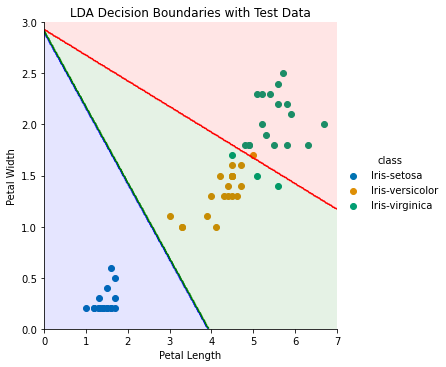

In [29]:
# LDA with 2 predictors
mod_lda_1 = LinearDiscriminantAnalysis()
y_pred = mod_lda_1.fit(X_train[selected_predictors], y_train_en).predict(X_test[selected_predictors])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="class", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_lda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Add axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('LDA Decision Boundaries with Test Data'); 

In [30]:
# QDA Classifier
mod_qda_all = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_all.fit(X_train, y_train).predict(X_test)
print('The accuracy of the QDA Classifier is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier is 0.983


In [31]:
# QDA Classifier with two predictors
mod_qda = QuadraticDiscriminantAnalysis()
y_pred = mod_qda.fit(X_train[selected_predictors], y_train).predict(X_test[selected_predictors])
print('The accuracy of the QDA Classifier with two predictors is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the QDA Classifier with two predictors is 0.967


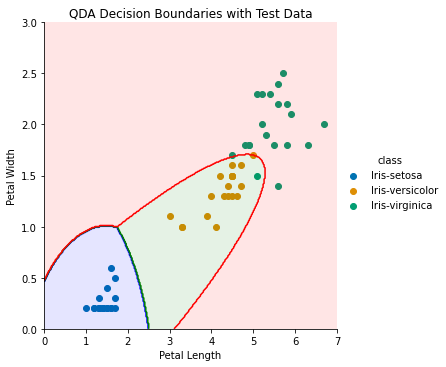

In [32]:
# QDA with 2 predictors
mod_qda_1 = QuadraticDiscriminantAnalysis()
y_pred = mod_qda_1.fit(X_train.iloc[:,2:4], y_train_en).predict(X_test.iloc[:,2:4])

N = 300
X = np.linspace(0, 7, N)
Y = np.linspace(0, 3, N)
X, Y = np.meshgrid(X, Y)

g = sns.FacetGrid(test, hue="class", height=5, palette = 'colorblind').map(plt.scatter,"petal_length", "petal_width", ).add_legend()
my_ax = g.ax

zz = np.array([mod_qda_1.predict(np.array([[xx,yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Petal Length')
my_ax.set_ylabel('Petal Width')
my_ax.set_title('QDA Decision Boundaries with Test Data');

In [33]:
# an example to tweak
# KNN, first try 5
mod_5nn=KNeighborsClassifier(n_neighbors=5) 
mod_5nn.fit(X_train,y_train)
prediction=mod_5nn.predict(X_test)
print('The accuracy of the 5NN Classifier is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the 5NN Classifier is 0.933


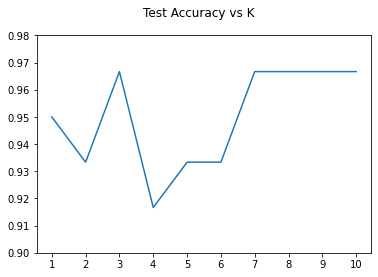

In [34]:
# an example
# try different k
acc_s = pd.Series(dtype = 'float')
for i in list(range(1,11)):
   mod_knn=KNeighborsClassifier(n_neighbors=i) 
   mod_knn.fit(X_train,y_train)
   prediction=mod_knn.predict(X_test)
   acc_s = acc_s.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
    
plt.plot(list(range(1,11)), acc_s)
plt.suptitle("Test Accuracy vs K")
plt.xticks(list(range(1,11)))
plt.ylim(0.9,0.98);